In [1]:
import pandas as pd
import numpy as np
from numpy.random import randint, rand
from sklearn.preprocessing import scale

In [2]:
Y = pd.read_csv('./data/Windram/WindramTrainingData.csv', index_col=[0]).T.values
mData = pd.read_csv('./data/Windram/WindramMetaData.csv', index_col=[0])

In [3]:
Y = scale(Y)

In [4]:
N, D = Y.shape
print('Time Points: %s, Genes: %s'%(N, D))

Time Points: 24, Genes: 100


In [5]:
mData['capture'].values

array([ 6,  6,  6,  6,  6,  6, 18, 18, 18, 18, 18, 18, 30, 30, 30, 30, 30,
       30, 42, 42, 42, 42, 42, 42], dtype=int64)

In [6]:
n_pop = N * 6
np.random.seed(10)
sigma_t = 3.
prior_mean = mData['capture'].values
print(type(prior_mean))
# N = 5
pop = [np.asanyarray([prior_mean[i] + sigma_t * np.random.randn(1) for i in range(0, N)]).reshape(-1) for _ in range(0, n_pop)]
# np.array(prior_mean).shape
# pop

<class 'numpy.ndarray'>


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import SplineTransformer
from sklearn.metrics import mean_squared_error

def objectiveFunction(x):
    x = x[:,None]
    x_ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x)
#     x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    
#     x_ = SplineTransformer(degree=2, n_knots=3).fit_transform(x)
    mse = 0.
    
    for i in range(0, D):
        y = Y[:,i]
        model = LinearRegression().fit(x_, y)

#         num_params = len(model.coef_) + 1
#         print('Number of parameters: %d' % (num_params))
#         print(model.coef_)

        # predict the training set
        yhat = model.predict(x_)
        # calculate the error
        mse += mean_squared_error(y, yhat)
#     print('MSE: %.3f' % mse)
    del model, y, yhat, x, x_
    return mse

# tournament selection
def selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

In [8]:
# crossover two parents to create two children
def crossover(p1, p2, r_cross=0.9):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
#     print('Sumon')
#     print(c1.shape)
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = np.concatenate( (p1[:pt], p2[pt:]), axis=None)
        c2 = np.concatenate( (p2[:pt], p1[pt:]), axis=None)
#         print(c1, c2)
    return [c1, c2]

# mutation operator
def mutation(offSpring, r_mut=0.05):
    sigma_mu = 2.
    for i in range(0, len(offSpring)):
        # check for a mutation
        if rand() < r_mut:
            offSpring[i] = offSpring[i] + sigma_mu * np.random.randn(1)

In [9]:
n_iter = 200
best, best_eval = 0, objectiveFunction(pop[0])
# print(best_eval)
for gen in range (0, n_iter):
    scores = [objectiveFunction(c) for c in pop]
    for j in range(0,n_pop):
        if scores[j] < best_eval:
            best, best_eval = pop[j], scores[j]
#     print(">%d, new best f(%s) = %.3f" % (gen,  best, best_eval))
    print(">%d, new best_eval = %.3f" % (gen, best_eval))
    
    # select parents
    selected = [selection(pop, scores) for _ in range(0,n_pop)]
#     print("Selected")
#     print(len(selected))
#     print(selected)
    # create the next generation
    children = list()
    for i in range(0, n_pop, 2):
        # get selected parents in pairs
        p1, p2 = selected[i], selected[i]
        # crossover and mutation
        for c in crossover(p1, p2, r_cross=0.95):
#             # mutation
            mutation(c, r_mut=0.1)
#             # store for next generation
            children.append(c)
#     print(len(children))
#     # replace population
    pop = children
#     return [best, best_eval]
print(best, best_eval)

>0, new best_eval = 33.917
>1, new best_eval = 33.886
>2, new best_eval = 33.603
>3, new best_eval = 32.434
>4, new best_eval = 31.836
>5, new best_eval = 31.396
>6, new best_eval = 30.891
>7, new best_eval = 30.714
>8, new best_eval = 30.405
>9, new best_eval = 30.360
>10, new best_eval = 30.232
>11, new best_eval = 30.032
>12, new best_eval = 29.758
>13, new best_eval = 29.684
>14, new best_eval = 29.587
>15, new best_eval = 29.585
>16, new best_eval = 29.585
>17, new best_eval = 29.585
>18, new best_eval = 29.555
>19, new best_eval = 29.555
>20, new best_eval = 29.386
>21, new best_eval = 29.049
>22, new best_eval = 29.036
>23, new best_eval = 29.036
>24, new best_eval = 28.982
>25, new best_eval = 28.879
>26, new best_eval = 28.857
>27, new best_eval = 28.855
>28, new best_eval = 28.824
>29, new best_eval = 28.713
>30, new best_eval = 28.498
>31, new best_eval = 28.498
>32, new best_eval = 28.498
>33, new best_eval = 28.382
>34, new best_eval = 28.382
>35, new best_eval = 28.382
>3

In [10]:
GrandPrixPseudotime = [ 2.86531809,  4.88945813,  5.96739786,  7.23224292,  7.29511602,  8.96443969,
 12.1667392,  13.0697646,  15.31346009, 15.18385335, 20.8482835,  21.97757157,
 28.11913182, 31.73585841, 33.19288584, 34.98632816, 35.81588204, 37.99144322,
 38.5310093,  39.15410389, 39.92016282, 40.13889337, 40.14194657, 40.53709647]

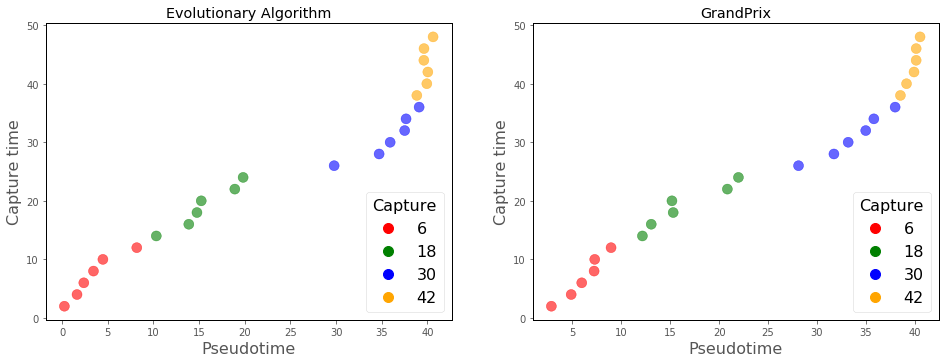

In [13]:
from matplotlib import pyplot as plt
from utils import plot
actual_capture_time = mData['capture.orig'].values
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 12))
plt.subplot(2, 2, 1)
plot('Evolutionary Algorithm', 'Pseudotime', 'Capture time', best, actual_capture_time, mData['capture'].values)
plt.subplot(2, 2, 2)
plot('GrandPrix', 'Pseudotime', 'Capture time', GrandPrixPseudotime, actual_capture_time, mData['capture'].values)
plt.show()

In [12]:
from scipy import stats
print(stats.spearmanr(best, GrandPrixPseudotime))

SpearmanrResult(correlation=0.9913043478260868, pvalue=7.113899561244949e-21)
